#### 1. Librerías

In [25]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Import onehotencoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler


# Tree Visualization
from IPython.display import Image
from sklearn.tree import export_graphviz
#!pip install pydot
import pydot

# Save model / deployment
import pickle
import sys

# Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

#### 2. Datos

In [26]:
# Carga de datos
df = pd.read_csv('../../Data/processed/delitos_mvd_final_sin_vd.csv')

In [27]:
# Visualización de los primeros registros
df.head().T

,0,1,2,3,4
BARRIO_MONTEVIDEO,AGUADA,AGUADA,AGUADA,AGUADA,AGUADA
FECHA,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
AÑO,2013,2013,2013,2013,2013
MES,1,1,1,1,1
DIA_MES,2,3,4,5,6
DIA_SEMANA,MIERCOLES,JUEVES,VIERNES,SABADO,DOMINGO
SEMANA_MES,1,1,1,1,1
SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE
TRIMESTRE,ENE-MAR,ENE-MAR,ENE-MAR,ENE-MAR,ENE-MAR
COUNT_DELITOS,1,1,6,1,4


In [28]:
# Transformación de la variable objetivo a binaria
df['RIESGO'] = df['RIESGO'].apply(lambda x: 1 if x == 'Alto' else 0)

In [29]:
#CHequeo de transformación
df['RIESGO'].value_counts()

RIESGO
0    181017
1     60626
Name: count, dtype: int64

In [30]:
# Nombre de las variables
df.columns

Index(['BARRIO_MONTEVIDEO', 'FECHA', 'AÑO', 'MES', 'DIA_MES', 'DIA_SEMANA',
       'SEMANA_MES', 'SEMESTRE', 'TRIMESTRE', 'COUNT_DELITOS', 'POBLACION',
       'TURISTICO', 'MUNICIPIO', 'PLAYA', 'INSE', 'TEMPMAX', 'TEMPMIN', 'TEMP',
       'FEELSLIKEMAX', 'FEELSLIKEMIN', 'FEELSLIKE', 'HUMIDITY', 'PRECIP',
       'WINDGUST', 'WINDSPEED', 'SEALEVELPRESSURE', 'VISIBILITY', 'SEVERERISK',
       'CONDITIONCLEAR', 'CONDITIONPARTIALLYCLOUDY', 'CONDITIONOVERCAST',
       'CONDITIONRAIN', 'WINDIRCAT', 'SEVERERISKCAT', 'TASA_DESEMPLEO',
       'NO_LABORABLE', 'NOMBRE_FESTIVO', 'COUNT_DELITOS_NORM', 'RIESGO'],
      dtype='object')

In [31]:
# Selección de variables para modelar # Eliminé visivility
df_red = df[['BARRIO_MONTEVIDEO', 'MES', 'DIA_MES', 'DIA_SEMANA','SEMANA_MES', 'SEMESTRE', 'TRIMESTRE',
        'TURISTICO', 'MUNICIPIO', 'PLAYA', 'INSE', 'TEMPMAX', 'HUMIDITY', 'PRECIP','WINDGUST', 'WINDSPEED', 'SEALEVELPRESSURE','CONDITIONCLEAR', 'CONDITIONPARTIALLYCLOUDY', 'CONDITIONOVERCAST',
        'CONDITIONRAIN', 'WINDIRCAT', 'SEVERERISKCAT', 'TASA_DESEMPLEO','NO_LABORABLE', 'NOMBRE_FESTIVO', 'RIESGO']].copy()

In [32]:
# Datos perdidos
df.isna().sum()

BARRIO_MONTEVIDEO               0
FECHA                           0
AÑO                             0
MES                             0
DIA_MES                         0
DIA_SEMANA                      0
SEMANA_MES                      0
SEMESTRE                        0
TRIMESTRE                       0
COUNT_DELITOS                   0
POBLACION                       0
TURISTICO                       0
MUNICIPIO                       0
PLAYA                           0
INSE                            0
TEMPMAX                         0
TEMPMIN                         0
TEMP                            0
FEELSLIKEMAX                    0
FEELSLIKEMIN                    0
FEELSLIKE                       0
HUMIDITY                        0
PRECIP                          0
WINDGUST                    38059
WINDSPEED                       0
SEALEVELPRESSURE                0
VISIBILITY                      0
SEVERERISK                      0
CONDITIONCLEAR                  0
CONDITIONPARTI

In [33]:
# Asignamos valor de WINDSPEED a datos nulos de WINDGUST
df_red['WINDGUST'] = df_red['WINDGUST'].fillna(df_red['WINDSPEED'])

In [34]:
# Chequeo
df_red.head().T

,0,1,2,3,4
BARRIO_MONTEVIDEO,AGUADA,AGUADA,AGUADA,AGUADA,AGUADA
MES,1,1,1,1,1
DIA_MES,2,3,4,5,6
DIA_SEMANA,MIERCOLES,JUEVES,VIERNES,SABADO,DOMINGO
SEMANA_MES,1,1,1,1,1
SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE,PRIMER SEMESTRE
TRIMESTRE,ENE-MAR,ENE-MAR,ENE-MAR,ENE-MAR,ENE-MAR
TURISTICO,0,0,0,0,0
MUNICIPIO,C,C,C,C,C
PLAYA,NO,NO,NO,NO,NO


#### 3. Separación en training y test dataset

In [35]:
# Defincicón de objetivo
X = df_red.drop('RIESGO', axis=1)
y = df_red['RIESGO']

# División de datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [36]:
# Chequeamos la el tamaño de los datos
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(193314, 26)
(48329, 26)
(193314,)
(48329,)


#### 4. Feature encoding y scaling

##### 4.1. Definición de Encoders

- Definicion de variables para encoding

In [37]:
# Definición de variables categóricas para one hot-encoding
one_hot_columns = ['DIA_SEMANA','SEMANA_MES', 'SEMESTRE', 'TRIMESTRE', 'PLAYA', 'WINDIRCAT', 'SEVERERISKCAT', 'NO_LABORABLE']

# Definición de variables numéricas para estandarización
continuous_columns = ['INSE', 'TEMPMAX', 'HUMIDITY', 'PRECIP', 'WINDGUST', 'WINDSPEED', 'SEALEVELPRESSURE', 'TASA_DESEMPLEO'] # Eliminé visivility

# Definición de variables para target encoding
targ_enc_columns = ['BARRIO_MONTEVIDEO', 'DIA_MES', 'MES' , 'MUNICIPIO', 'NOMBRE_FESTIVO']

# Definición de variables para WOE
woe_columns = ['BARRIO_MONTEVIDEO']

- One hot Encoding

In [38]:
from category_encoders.one_hot import OneHotEncoder

# Function to apply One-Hot Encoding to the specified categorical columns.
def apply_one_hot_encoding(X_train, X_test, categorical_columns):
    """
    Apply One-Hot Encoding to the specified categorical columns using category_encoders.

    Parameters:
    - X_train: DataFrame, the training dataset.
    - X_test: DataFrame, the testing dataset.
    - categorical_columns: list, list of categorical columns to encode.

    Returns:
    - X_train_encoded: DataFrame, the training dataset with One-Hot Encoded columns.
    - X_test_encoded: DataFrame, the testing dataset with One-Hot Encoded columns.
    - encoder: Fitted OneHotEncoder instance from category_encoders.
    """
    # Initialize the OneHotEncoder from category_encoders
    encoder = OneHotEncoder(cols=categorical_columns, use_cat_names=True)

    # Fit and transform the training set
    X_train_encoded = encoder.fit_transform(X_train)

    # Transform the testing set using the same encoder
    X_test_encoded = encoder.transform(X_test)

    return X_train_encoded, X_test_encoded, encoder

- Standard Scaling Encoding

In [39]:
# Function to apply Standard Scaling to the specified numerical columns.
def apply_scaling(X_train, X_test, scale_columns):
    """
    Apply Standard Scaling to the specified numerical columns.

    Parameters:
    - X_train: DataFrame, the training dataset.
    - X_test: DataFrame, the testing dataset.
    - scale_columns: list, list of numerical columns to scale.

    Returns:
    - X_train_scaled: DataFrame, the training dataset with scaled columns.
    - X_test_scaled: DataFrame, the testing dataset with scaled columns.
    - scaler: Fitted StandardScaler instance.
    """
    # Initialize the Standard Scaler
    scaler = StandardScaler()

    # Fit the scaler on the training set and transform
    X_train_scaled = X_train.copy()
    X_train_scaled[scale_columns] = scaler.fit_transform(X_train[scale_columns])

    # Transform the testing set using the same scaler
    X_test_scaled = X_test.copy()
    X_test_scaled[scale_columns] = scaler.transform(X_test[scale_columns])

    return X_train_scaled, X_test_scaled, scaler

- Target Encoding

In [40]:
# Function to apply Target encoding to the specified categorical columns.
from category_encoders.target_encoder import TargetEncoder

def apply_target_encoding(X_train, y_train, X_test, target_columns):
    """
    Apply Target Encoding to the specified categorical columns using category_encoders.

    Parameters:
    - X_train: DataFrame, the training dataset.
    - y_train: Series, the target variable for the training dataset.
    - X_test: DataFrame, the testing dataset.
    - target_columns: list, list of categorical columns to transform.

    Returns:
    - X_train_transformed: DataFrame, the training dataset with Target-encoded columns.
    - X_test_transformed: DataFrame, the testing dataset with Target-encoded columns.
    - target_encoder: Fitted TargetEncoder instance.
    """
    # Initialize the Target encoder
    target_encoder = TargetEncoder(cols=target_columns)

    # Fit and transform the training set
    X_train_transformed = target_encoder.fit_transform(X_train, y_train)

    # Transform the testing set using the same encoder
    X_test_transformed = target_encoder.transform(X_test)

    return X_train_transformed, X_test_transformed, target_encoder

- WOE Encoding

In [41]:
from category_encoders.woe import WOEEncoder

# Function to apply WOE encoding to the specified categorical columns.
def apply_woe(X_train, y_train, X_test, woe_columns):
    """
    Apply WOE encoding to the specified categorical columns using category_encoders.

    Parameters:
    - X_train: DataFrame, the training dataset.
    - y_train: Series, the target variable for the training dataset.
    - X_test: DataFrame, the testing dataset.
    - woe_columns: list, list of categorical columns to transform.

    Returns:
    - X_train_transformed: DataFrame, the training dataset with WOE-transformed columns.
    - X_test_transformed: DataFrame, the testing dataset with WOE-transformed columns.
    - woe_encoder: Fitted WOEEncoder instance.
    """
    # Initialize the WOE encoder
    woe_encoder = WOEEncoder(cols=woe_columns)

    # Fit and transform the training set
    X_train_transformed = woe_encoder.fit_transform(X_train, y_train)

    # Transform the testing set using the same encoder
    X_test_transformed = woe_encoder.transform(X_test)

    return X_train_transformed, X_test_transformed, woe_encoder

- Función para aplicar el encoding

In [42]:
# Function to transform Train and Test data using the defined encoders

def encoding_data (X_train, y_train, X_test):
    """
    Transforms Train and Test datasets by applying WOE encoding, Target encoding, 
    Standard scaling, and One-Hot encoding.
    
    Parameters:
    - X_train: DataFrame, training features.
    - y_train: Series/DataFrame, target variable for training.
    - X_test: DataFrame, testing features.
    
    Returns:
    - X_train_enc: Transformed training dataset.
    - X_test_enc: Transformed testing dataset.
    - woe_encoder, target_encoder, scaler, one_hot_encoder: Fitted encoders and scaler.
    """
    
    X_train_enc = X_train.copy()
    X_test_enc = X_test.copy()

    
    
    # Applying Target encoding
    X_train_enc, X_test_enc, target_encoder = apply_target_encoding(X_train_enc, y_train, X_test_enc, targ_enc_columns)
    
    # Applying Standard Scaling
    X_train_enc, X_test_enc, scaler = apply_scaling(X_train_enc, X_test_enc, continuous_columns)
    
    # Applying One-hot encoding
    X_train_enc, X_test_enc, one_hot_encoder = apply_one_hot_encoding(X_train_enc, X_test_enc, one_hot_columns)
    
    # Applying WOE encoding
    X_train_enc, X_test_enc, woe_encoder = apply_woe(X_train_enc, y_train, X_test_enc, woe_columns)
    
    return X_train_enc, X_test_enc

##### 4.2. Aplicando Encoding a Training y Test dataset

In [43]:
# Encoding de Train y Test
X_train_enc, X_test_enc = encoding_data(X_train, y_train, X_test)

In [44]:
# Chequeo de Train transformado
X_train_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193314 entries, 3043 to 43074
Data columns (total 47 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   BARRIO_MONTEVIDEO          193314 non-null  float64
 1   MES                        193314 non-null  float64
 2   DIA_MES                    193314 non-null  float64
 3   DIA_SEMANA_VIERNES         193314 non-null  int64  
 4   DIA_SEMANA_MARTES          193314 non-null  int64  
 5   DIA_SEMANA_SABADO          193314 non-null  int64  
 6   DIA_SEMANA_MIERCOLES       193314 non-null  int64  
 7   DIA_SEMANA_JUEVES          193314 non-null  int64  
 8   DIA_SEMANA_LUNES           193314 non-null  int64  
 9   DIA_SEMANA_DOMINGO         193314 non-null  int64  
 10  SEMANA_MES_1.0             193314 non-null  int64  
 11  SEMANA_MES_2.0             193314 non-null  int64  
 12  SEMANA_MES_4.0             193314 non-null  int64  
 13  SEMANA_MES_5.0             19331

In [45]:
X_train_enc.head().T

,3043,207896,202209,64752,18064
BARRIO_MONTEVIDEO,0.225654,-0.314118,0.029685,0.164925,0.506326
MES,0.253142,0.242432,0.242432,0.240653,0.277214
DIA_MES,0.252090,0.238178,0.257232,0.246560,0.254139
DIA_SEMANA_VIERNES,1.000000,0.000000,0.000000,0.000000,0.000000
DIA_SEMANA_MARTES,0.000000,1.000000,0.000000,1.000000,0.000000
DIA_SEMANA_SABADO,0.000000,0.000000,1.000000,0.000000,0.000000
DIA_SEMANA_MIERCOLES,0.000000,0.000000,0.000000,0.000000,1.000000
DIA_SEMANA_JUEVES,0.000000,0.000000,0.000000,0.000000,0.000000
DIA_SEMANA_LUNES,0.000000,0.000000,0.000000,0.000000,0.000000
DIA_SEMANA_DOMINGO,0.000000,0.000000,0.000000,0.000000,0.000000


#### 5. Funciónes

##### 5.1. Función para cáculo de métricas

In [68]:
# Import auc, recall score, f1 score, precision score, confusion matrix, roc curve, accuracy score
from sklearn.metrics import auc, recall_score, f1_score, precision_score, confusion_matrix, roc_curve, accuracy_score



def compute_metrics(model, X_train, y_train, X_test, y_test, trh=0.5):
    """
    Calcula y muestra métricas de evaluación para modelos de clasificación en datasets balanceados o desbalanceados.
    """
    y_pred_proba_train = model.predict_proba(X_train)[:, 1]
    y_pred_proba_test = model.predict_proba(X_test)[:, 1]

    y_pred_train = (y_pred_proba_train >= trh).astype(bool)
    y_pred_test = (y_pred_proba_test >= trh).astype(bool)

    # Curva ROC
    fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_proba_train)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test)

    # Matriz de confusión
    tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_pred_train).ravel()
    tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_pred_test).ravel()

    specificity_train = tn_train / (tn_train + fp_train)
    specificity_test = tn_test / (tn_test + fp_test)

    # Métricas en Train
    print(f'{model.__class__.__name__}')
    print(' ')
    print(f' 🔵 Train results:')
    print(f" AUC: {auc(fpr_train, tpr_train):.3f}")
    print(f" Recall : {recall_score(y_train, y_pred_train):.3f}")
    print(f" F1-score : {f1_score(y_train, y_pred_train):.3f}")
    print(f" Precision : {precision_score(y_train, y_pred_train):.3f}")
    print(f" Specificity: {specificity_train:.3f}")
    print(f" Accuracy: {accuracy_score(y_train, y_pred_train):.3f}")
    print(' ')

    # Métricas en Test
    print(f' 🟠 Test results:')
    print(f" AUC: {auc(fpr_test, tpr_test):.3f}")
    print(f" Recall : {recall_score(y_test, y_pred_test, ):.3f}")
    print(f" F1-score : {f1_score(y_test, y_pred_test):.3f}")
    print(f" Precision : {precision_score(y_test, y_pred_test):.3f}")
    print(f" Specificity: {specificity_test:.3f}")
    print(f" Accuracy: {accuracy_score(y_test, y_pred_test):.3f}")

        
    # Crear curva ROC
    plt.figure(figsize=(4, 4))
    plt.plot(fpr_train, tpr_train, '-r')
    plt.plot(fpr_test, tpr_test, '-b')
    plt.plot([0, 1], ls="--")
    plt.legend(['Train', 'Test'])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve')
    plt.show()

    # Mostrar matrices de confusión como gráficos de calor
    fig, axes = plt.subplots(1, 2, figsize=(12, 1))
    
    # Matriz de confusión para Train
    sns.heatmap(metrics.confusion_matrix(y_train, y_pred_train), annot=True, fmt="d", cmap="Reds", ax=axes[0])
    axes[0].set_title("Confusion Matrix (Train)")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")
    
    # Matriz de confusión para Test
    sns.heatmap(metrics.confusion_matrix(y_test, y_pred_test), annot=True, fmt="d", cmap="Blues", ax=axes[1])
    axes[1].set_title("Confusion Matrix (Test)")
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("Actual")
    
    plt.show()


#### 6. Modelado

6.1. Feature Importance con Arbol de decisión

DecisionTreeClassifier
 
 🔵 Train results:
 AUC: 1.000
 Recall : 1.000
 F1-score : 1.000
 F1-score weighted : 1.000
 Precision : 1.000
 Specificity: 1.000
 Accuracy: 1.000
 
 🟠 Test results:
 AUC: 0.580
 Recall : 0.375
 F1-score : 0.372
 F1-score weighted : 0.683
 Precision : 0.369
 Specificity: 0.785
 Accuracy: 0.682


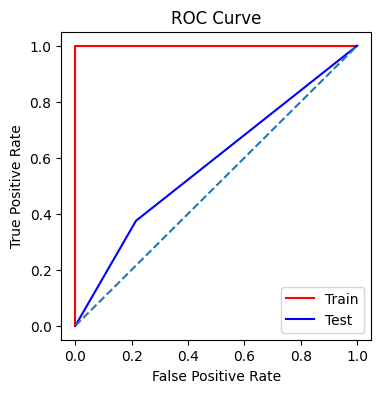

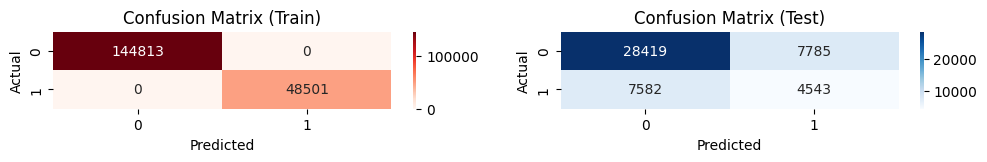

In [69]:
# Define the model decision tree
model_dt_1 = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Train the model
model_dt_1.fit(X_train_enc, y_train)

# Compute metrics
compute_metrics(model_dt_1, X_train_enc, y_train, X_test_enc, y_test)

- Se define definen subsets con variables de mayor importancia

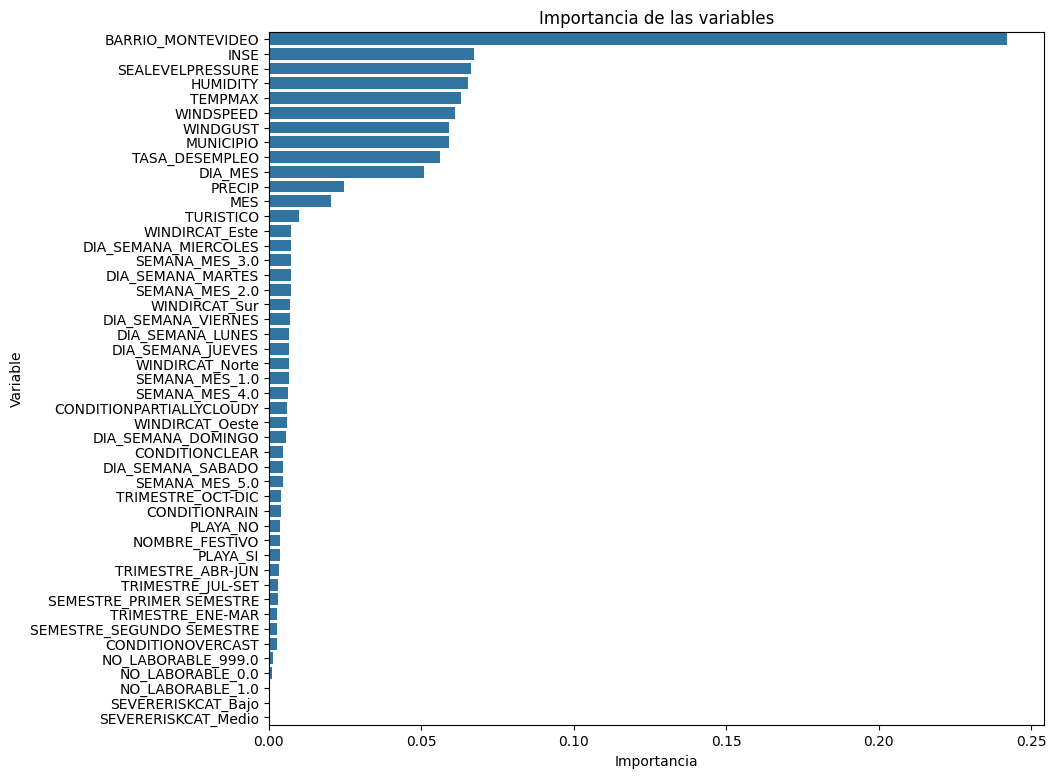

In [48]:
# Obtener la importancia de las variables
importancias = model_dt_1.feature_importances_
variables = X_train_enc.columns

# Graficar importancia de las variables ordenadas
df_importancia = pd.DataFrame({'Variable': variables, 'Importancia': importancias})
df_importancia = df_importancia.sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10, 9))
sns.barplot(x='Importancia', y='Variable', data=df_importancia)
plt.title('Importancia de las variables')
plt.show()

top_n = 15  # Número de variables a conservar
top_variables = df_importancia.iloc[:top_n]['Variable'].values

# Redefinir dataset con menos variables
X_train_reducido = X_train_enc[top_variables]
X_test_reducido = X_test_enc[top_variables]

##### 6.2. Regresión Logística

In [71]:
# Definir el modelo
model_rl_1 =  LogisticRegression(solver = 'liblinear', random_state= 1234, class_weight='balanced' ) # class_weight='balanced' para balancear las clases
# Entrenar el modelo
model_rl_1.fit(X_train_enc, y_train)

LogisticRegression(class_weight='balanced', random_state=1234,
                   solver='liblinear')

Mejor umbral para F1: 0.505


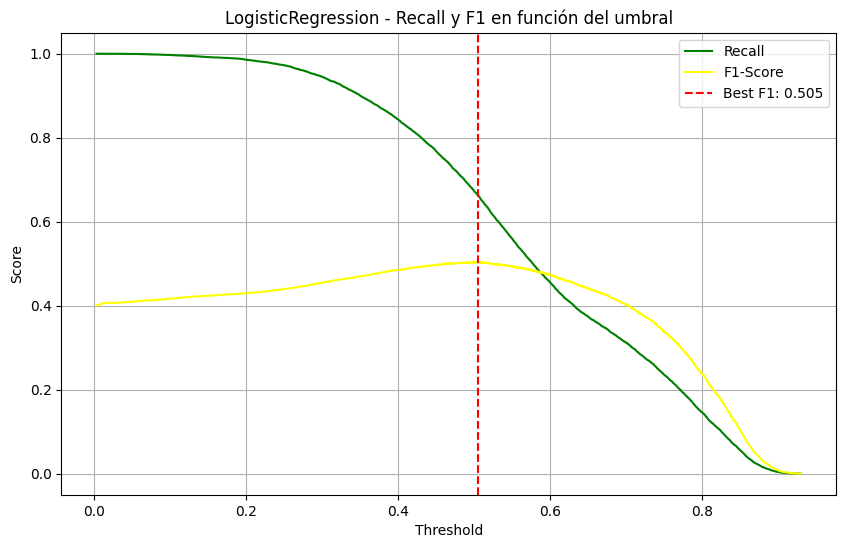

In [242]:
# Evaluación de umbral, F1 y Recall
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score, recall_score

# Entrenar el mejor modelo con los hiperparámetros óptimos
best_model = model_rl_1

# Obtener probabilidades de predicción en test
y_probs = best_model.predict_proba(X_test_enc)[:, 1]  

# Calcular la curva de precisión-recall
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Calcular F1 para cada umbral
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)  # Evita divisiones por cero

# Encontrar los mejores umbrales para Recall y F1
best_threshold_f1 = thresholds[np.argmax(f1_scores)]


print(f"Mejor umbral para F1: {best_threshold_f1:.3f}")


# Graficar Recall y F1 en función del umbral
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls[:-1], label="Recall", color="green")
plt.plot(thresholds, f1_scores[:-1], label="F1-Score", color="yellow")
plt.axvline(x=best_threshold_f1, color="red", linestyle="--", label=f"Best F1: {best_threshold_f1:.3f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title(f'{best_model.__class__.__name__} - Recall y F1 en función del umbral')
plt.legend()
plt.grid()
plt.show()

LogisticRegression
 
 🔵 Train results:
 AUC: 0.730
 Recall : 0.392
 F1-score : 0.444
 F1-score weighted : 0.742
 Precision : 0.511
 Specificity: 0.875
 Accuracy: 0.753
 
 🟠 Test results:
 AUC: 0.736
 Recall : 0.403
 F1-score : 0.455
 F1-score weighted : 0.747
 Precision : 0.524
 Specificity: 0.877
 Accuracy: 0.758


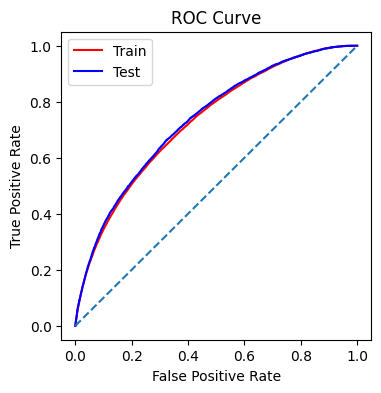

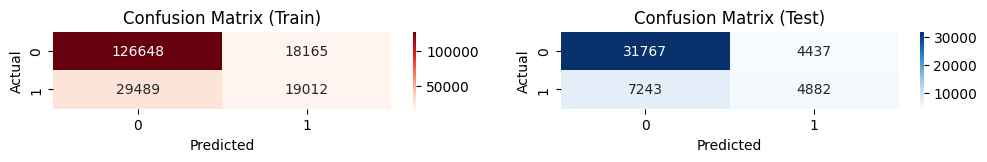

In [82]:
# Calcular métricas
compute_metrics(model_rl_1, X_train_enc, y_train, X_test_enc, y_test, trh=0.630)

- Solamente con variables más importantes

In [243]:
# Definir el modelo
model_rl_2 =  LogisticRegression(solver = 'liblinear', random_state= 1234, class_weight='balanced' ) # class_weight='balanced' para balancear las clases
# Entrenar el modelo
model_rl_2.fit(X_train_reducido, y_train)

LogisticRegression(class_weight='balanced', random_state=1234,
                   solver='liblinear')

Mejor umbral para F1: 0.496


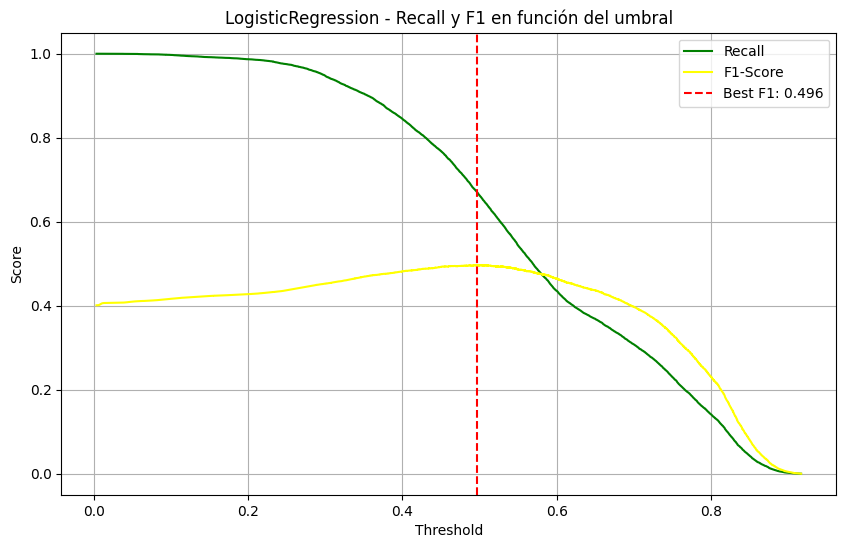

In [246]:
# Evaluación de umbral, F1 y Recall

# Entrenar el mejor modelo con los hiperparámetros óptimos
best_model = model_rl_2

# Obtener probabilidades de predicción en test
y_probs = best_model.predict_proba(X_test_reducido)[:, 1]  

# Calcular la curva de precisión-recall
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Calcular F1 para cada umbral
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)  # Evita divisiones por cero

# Encontrar los mejores umbrales para Recall y F1
best_threshold_f1 = thresholds[np.argmax(f1_scores)]


print(f"Mejor umbral para F1: {best_threshold_f1:.3f}")


# Graficar Recall y F1 en función del umbral
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls[:-1], label="Recall", color="green")
plt.plot(thresholds, f1_scores[:-1], label="F1-Score", color="yellow")
plt.axvline(x=best_threshold_f1, color="red", linestyle="--", label=f"Best F1: {best_threshold_f1:.3f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title(f'{best_model.__class__.__name__} - Recall y F1 en función del umbral')
plt.legend()
plt.grid()
plt.show()

LogisticRegression
 
 🔵 Train results:
 AUC: 0.726
 Recall : 0.665
 F1-score : 0.492
 Precision : 0.390
 Specificity: 0.651
 Accuracy: 0.655
 
 🟠 Test results:
 AUC: 0.731
 Recall : 0.672
 F1-score : 0.497
 Precision : 0.394
 Specificity: 0.653
 Accuracy: 0.658


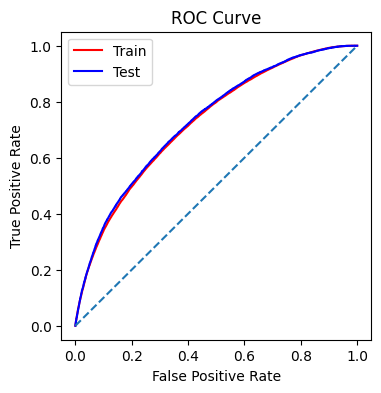

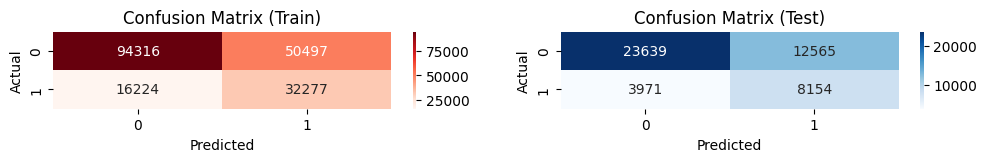

In [248]:
# Calcular métricas
compute_metrics(model_rl_2, X_train_reducido, y_train, X_test_reducido, y_test, trh=0.496)

- A partir de ahora utilizamos el datset reducido de train y test

**Optimización de Hiperparámetos con Optuna **

In [50]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Definir la función objetivo para Optuna
def objective(trial):
    # 🔹 Hiperparámetros a optimizar
    C = trial.suggest_float('C', 0.0001, 10, log=True)  # Regularización
    solver = trial.suggest_categorical('solver', ['lbfgs','sag', 'saga','newton-cholesky'])  # Algoritmo de optimización
    penalty = trial.suggest_categorical('penalty', [None, 'l2'])  # Norma de penalización
    max_iter = trial.suggest_int('max_iter', 100, 500)  # Iteraciones máximas
    class_weight = trial.suggest_categorical('class_weight', ['balanced', None])  # Pesos de clases
    tol = trial.suggest_float('tol', 1e-6, 1e-3, log=True)  # Tolerancia de convergencia

    # 🔹 Crear modelo con los hiperparámetros sugeridos
    model = LogisticRegression(
        C=C,
        solver=solver,
        penalty=penalty,
        max_iter=max_iter,
        class_weight=class_weight,
        random_state=42,
        tol=tol,
        n_jobs=-1  
    )

    # 🔹 Evaluación con validación cruzada (5 folds)
    auc = cross_val_score(model, X_train_reducido, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()

    return auc  # Optuna maximizará AUC

# 🔹 Configurar y ejecutar la optimización con `MedianPruner`
pruner = optuna.pruners.MedianPruner(n_warmup_steps=5)  # Espera 5 pruebas antes de cortar
study = optuna.create_study(direction="maximize", pruner=pruner)
study.optimize(objective, n_trials=20) 

# 🔹 Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", study.best_params)


[I 2025-02-04 16:20:42,006] A new study created in memory with name: no-name-a177de78-5b3e-41b2-ab96-a337be825351


[I 2025-02-04 16:20:50,763] Trial 0 finished with value: 0.7250091785345137 and parameters: {'C': 0.062098727672643336, 'solver': 'newton-cholesky', 'penalty': 'l2', 'max_iter': 288, 'class_weight': 'balanced', 'tol': 3.420582671776154e-05}. Best is trial 0 with value: 0.7250091785345137.
[I 2025-02-04 16:22:38,203] Trial 1 finished with value: 0.7257324518098922 and parameters: {'C': 1.778807147892901, 'solver': 'saga', 'penalty': None, 'max_iter': 485, 'class_weight': None, 'tol': 5.536960962723472e-05}. Best is trial 1 with value: 0.7257324518098922.
[I 2025-02-04 16:22:43,036] Trial 2 finished with value: 0.7245082139445379 and parameters: {'C': 0.004026657767691644, 'solver': 'sag', 'penalty': 'l2', 'max_iter': 253, 'class_weight': None, 'tol': 2.66711173749332e-06}. Best is trial 1 with value: 0.7257324518098922.
[I 2025-02-04 16:22:44,440] Trial 3 finished with value: 0.7257366734089872 and parameters: {'C': 0.05235699342699224, 'solver': 'newton-cholesky', 'penalty': None, 'max

Mejores hiperparámetros: {'C': 0.05235699342699224, 'solver': 'newton-cholesky', 'penalty': None, 'max_iter': 339, 'class_weight': None, 'tol': 0.00010353187253721523}


In [35]:
# Definimos el modelo con los hiperparámetros óptimos
model_rl_3= LogisticRegression(
    **study.best_params,
    class_weight='balanced',  # Ajuste automático para desbalance de clases
    random_state=42,
    n_jobs=-1
)

# Entrenamos el modelo con los datos de entrenamiento
model_rl_3.fit(X_train_reducido, y_train)

c:\Users\usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


LogisticRegression(C=2.8970595502355554, class_weight='balanced', max_iter=411,
                   n_jobs=-1, penalty=None, random_state=42,
                   solver='newton-cholesky')

Mejor umbral para F1: 0.498


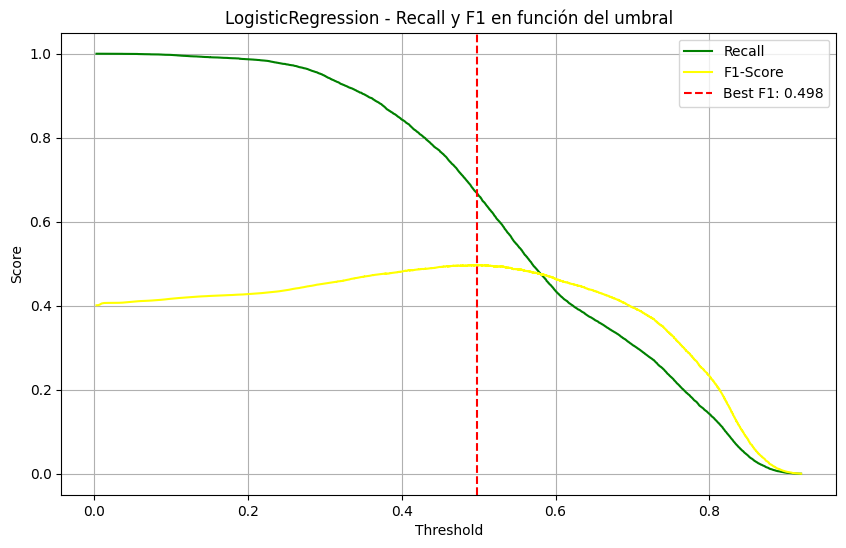

In [37]:
from sklearn.metrics import precision_recall_curve

# Evaluación de umbral, F1 y Recall

# Entrenar el mejor modelo con los hiperparámetros óptimos
best_model = model_rl_3

# Obtener probabilidades de predicción en test
y_probs = best_model.predict_proba(X_test_reducido)[:, 1]  

# Calcular la curva de precisión-recall
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Calcular F1 para cada umbral
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)  # Evita divisiones por cero

# Encontrar los mejores umbrales para Recall y F1
best_threshold_f1 = thresholds[np.argmax(f1_scores)]


print(f"Mejor umbral para F1: {best_threshold_f1:.3f}")


# Graficar Recall y F1 en función del umbral
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls[:-1], label="Recall", color="green")
plt.plot(thresholds, f1_scores[:-1], label="F1-Score", color="yellow")
plt.axvline(x=best_threshold_f1, color="red", linestyle="--", label=f"Best F1: {best_threshold_f1:.3f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title(f'{best_model.__class__.__name__} - Recall y F1 en función del umbral')
plt.legend()
plt.grid()
plt.show()

LogisticRegression
 
 🔵 Train results:
 AUC: 0.726
 Recall : 0.661
 F1-score : 0.492
 Precision : 0.392
 Specificity: 0.657
 Accuracy: 0.658
 
 🟠 Test results:
 AUC: 0.731
 Recall : 0.668
 F1-score : 0.497
 Precision : 0.395
 Specificity: 0.658
 Accuracy: 0.660


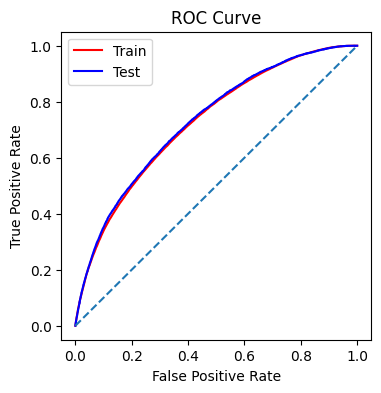

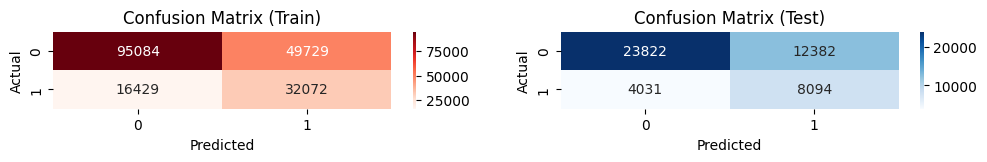

In [46]:
# Métricas
compute_metrics(model_rl_3, X_train_reducido, y_train, X_test_reducido, y_test, trh=0.498)

- Dejamos fijo el solver del modelo anterior y optimizamos nuevamente ('newton-cholesky')

In [48]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Definir la función objetivo para Optuna
def objective(trial):
    # Hiperparámetros a optimizar
    C = trial.suggest_float('C', 0.0001, 10, log=True)  # Regularización
    solver = trial.suggest_categorical('solver', ['lbfgs','sag', 'saga','newton-cholesky'])  # Algoritmo de optimización
    penalty = trial.suggest_categorical('penalty', [None, 'l2'])  # Norma de penalización
    max_iter = trial.suggest_int('max_iter', 100, 1000, step=50)  # Iteraciones máximas
    class_weight = trial.suggest_categorical('class_weight', ['balanced', None])  # Pesos de clases
    tol = trial.suggest_float('tol', 1e-6, 1e-3, log=True)  # Tolerancia de convergencia

    # Crear modelo con los hiperparámetros sugeridos
    model = LogisticRegression(
        C=C,
        solver='newton-cholesky',
        penalty=penalty,
        max_iter=max_iter,
        tol=tol,
        class_weight=class_weight,  # Ajuste automático para desbalance de clases
        random_state=42,
        n_jobs=-1  
    )

    # Evaluación con validación cruzada (5 folds)
    auc = cross_val_score(model, X_train_reducido, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()

    return auc  # Optuna maximizará AUC

# Configurar y ejecutar la optimización con `MedianPruner`
pruner = optuna.pruners.MedianPruner(n_warmup_steps=5)  # Espera 5 pruebas antes de cortar
study = optuna.create_study(direction="maximize", pruner=pruner)
study.optimize(objective, n_trials=500) 

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", study.best_params)

[I 2025-02-04 00:03:34,959] A new study created in memory with name: no-name-a05bc297-9b31-4d65-9304-150466b5db23
[I 2025-02-04 00:03:41,759] Trial 0 finished with value: 0.7257244432147976 and parameters: {'C': 0.0012134326995733508, 'solver': 'sag', 'penalty': None, 'max_iter': 950, 'class_weight': 'balanced', 'tol': 0.0003349002153678698}. Best is trial 0 with value: 0.7257244432147976.
[I 2025-02-04 00:03:46,154] Trial 1 finished with value: 0.7246026941655945 and parameters: {'C': 0.01103774369556682, 'solver': 'newton-cholesky', 'penalty': 'l2', 'max_iter': 550, 'class_weight': 'balanced', 'tol': 0.0007163103420158194}. Best is trial 0 with value: 0.7257244432147976.
[I 2025-02-04 00:03:47,462] Trial 2 finished with value: 0.7245160425341324 and parameters: {'C': 0.004768576939538295, 'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 900, 'class_weight': None, 'tol': 0.00044224341651808797}. Best is trial 0 with value: 0.7257244432147976.
[I 2025-02-04 00:03:49,077] Trial 3 finishe

Mejores hiperparámetros: {'C': 2.056844509936969, 'solver': 'sag', 'penalty': None, 'max_iter': 600, 'class_weight': None, 'tol': 1.0344220506878217e-05}


In [51]:
# Definimos el modelo con los hiperparámetros óptimos
model_rl_4= LogisticRegression(
    **study.best_params,
    random_state=42,
    n_jobs=-1
)

# Entrenamos el modelo con los datos de entrenamiento
model_rl_4.fit(X_train_reducido, y_train)

c:\Users\usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


LogisticRegression(C=2.056844509936969, max_iter=600, n_jobs=-1, penalty=None,
                   random_state=42, solver='sag', tol=1.0344220506878217e-05)

Mejor umbral para F1: 0.252


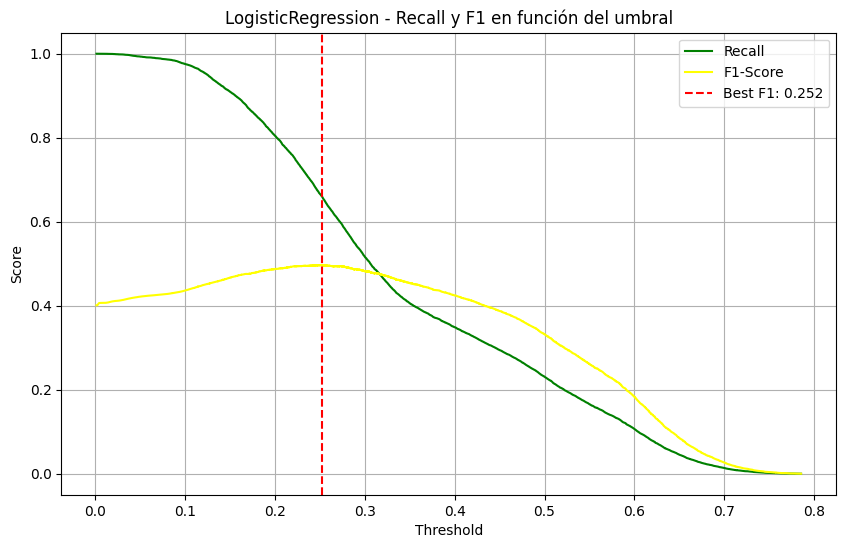

In [52]:
from sklearn.metrics import precision_recall_curve

# Evaluación de umbral, F1 y Recall

# Entrenar el mejor modelo con los hiperparámetros óptimos
best_model = model_rl_4

# Obtener probabilidades de predicción en test
y_probs = best_model.predict_proba(X_test_reducido)[:, 1]  

# Calcular la curva de precisión-recall
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Calcular F1 para cada umbral
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)  # Evita divisiones por cero

# Encontrar los mejores umbrales para Recall y F1
best_threshold_f1 = thresholds[np.argmax(f1_scores)]


print(f"Mejor umbral para F1: {best_threshold_f1:.3f}")


# Graficar Recall y F1 en función del umbral
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls[:-1], label="Recall", color="green")
plt.plot(thresholds, f1_scores[:-1], label="F1-Score", color="yellow")
plt.axvline(x=best_threshold_f1, color="red", linestyle="--", label=f"Best F1: {best_threshold_f1:.3f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title(f'{best_model.__class__.__name__} - Recall y F1 en función del umbral')
plt.legend()
plt.grid()
plt.show()

LogisticRegression
 
 🔵 Train results:
 AUC: 0.726
 Recall : 0.653
 F1-score : 0.492
 Precision : 0.394
 Specificity: 0.664
 Accuracy: 0.661
 
 🟠 Test results:
 AUC: 0.731
 Recall : 0.661
 F1-score : 0.497
 Precision : 0.398
 Specificity: 0.665
 Accuracy: 0.664


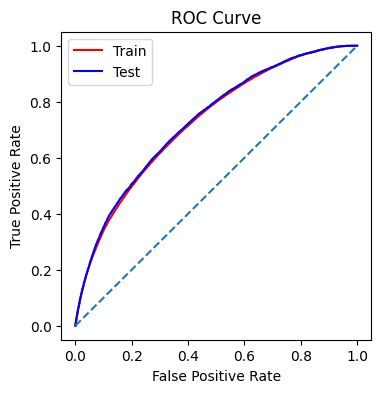

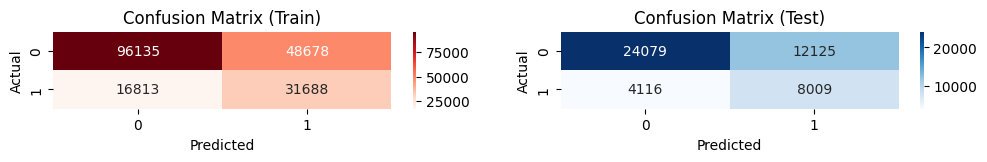

In [54]:
# Métricas
compute_metrics(model_rl_4, X_train_reducido, y_train, X_test_reducido, y_test, trh=0.252)

#### 6.3. KNN

In [56]:
# Define model
knn_model1 = KNeighborsClassifier(n_neighbors=3,
                                metric= 'hamming',
                                weights = 'distance',
                                n_jobs=-1) # 'uniform')

# Train model
knn_model1.fit(X_train_reducido, y_train)

KNeighborsClassifier(metric='hamming', n_jobs=-1, n_neighbors=3,
                     weights='distance')

Mejor umbral para F1: 0.000


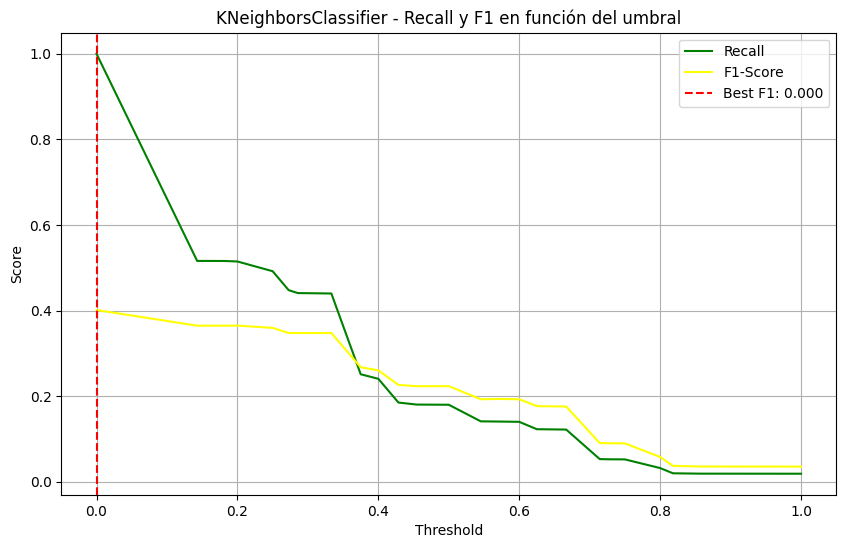

In [57]:
from sklearn.metrics import precision_recall_curve

# Evaluación de umbral, F1 y Recall

# Entrenar el mejor modelo con los hiperparámetros óptimos
best_model = knn_model1

# Obtener probabilidades de predicción en test
y_probs = best_model.predict_proba(X_test_reducido)[:, 1]  

# Calcular la curva de precisión-recall
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Calcular F1 para cada umbral
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)  # Evita divisiones por cero

# Encontrar los mejores umbrales para Recall y F1
best_threshold_f1 = thresholds[np.argmax(f1_scores)]


print(f"Mejor umbral para F1: {best_threshold_f1:.3f}")


# Graficar Recall y F1 en función del umbral
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls[:-1], label="Recall", color="green")
plt.plot(thresholds, f1_scores[:-1], label="F1-Score", color="yellow")
plt.axvline(x=best_threshold_f1, color="red", linestyle="--", label=f"Best F1: {best_threshold_f1:.3f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title(f'{best_model.__class__.__name__} - Recall y F1 en función del umbral')
plt.legend()
plt.grid()
plt.show()

In [58]:
# Métricas
compute_metrics(knn_model1, X_train_reducido, y_train, X_test_reducido, y_test, trh=0.252)

KeyboardInterrupt: 

In [59]:
import optuna
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Definir la función objetivo para Optuna
def objective(trial):
    # 🔹 Hiperparámetros a optimizar
    n_neighbors = trial.suggest_int('n_neighbors', 3, 20)  # Número de vecinos
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])  # Ponderación de vecinos
    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski'])  # Métrica de distancia

    # Si se usa Minkowski, optimizar también el parámetro `p`
    p = trial.suggest_int('p', 1, 5) if metric == 'minkowski' else 2

    # 🔹 Crear modelo con los hiperparámetros optimizados
    model = KNeighborsClassifier(
        n_neighbors=n_neighbors,
        weights=weights,
        metric=metric,
        p=p,
        n_jobs=-1  # Usa todos los núcleos disponibles
    )

    # 🔹 Evaluación con validación cruzada (5 folds)
    auc = cross_val_score(model, X_train_reducido, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()

    return auc  # Optuna maximizará AUC

# 🔹 Configurar y ejecutar la optimización con Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=500)

# 🔹 Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", study.best_params)


[I 2025-02-04 00:41:20,531] A new study created in memory with name: no-name-acda4f90-df6d-4c4c-94cd-57c29a92f8af


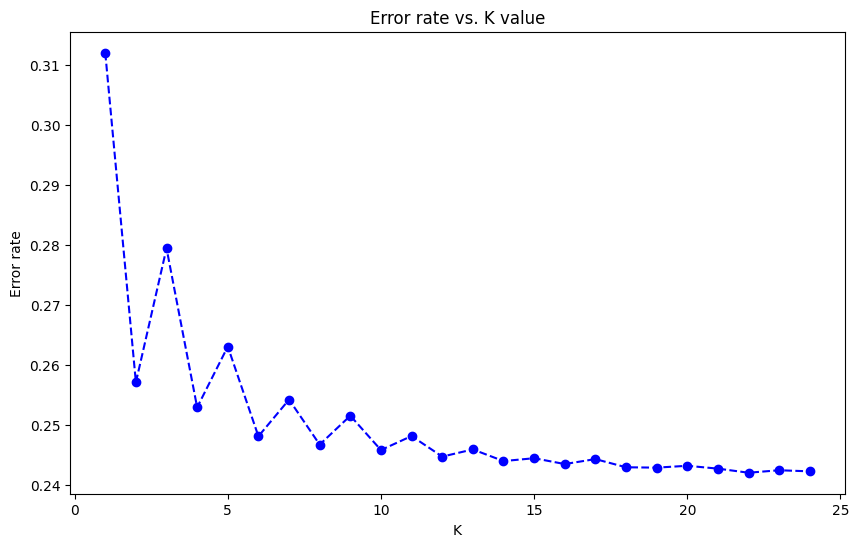

In [32]:
# Create a for loop that trains various KNN models and graph error rate vs. K value

error_rate = []

for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i,
                            metric= 'euclidean',
                            weights = 'uniform',
                            n_jobs=-1)
    knn.fit(X_train_enc, y_train)

    pred_i = knn.predict(X_test_enc)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize = (10, 6))
plt.plot(range(1,25), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.title('Error rate vs. K value')
plt.show()

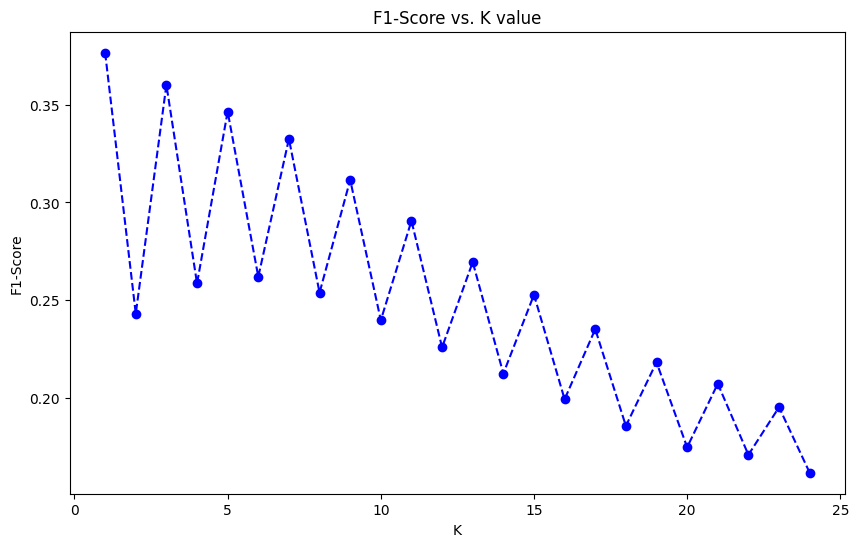

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

f1_scores = []

# Iterar sobre valores de K
for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=i,
                                metric='euclidean',
                                weights='uniform',
                                n_jobs=-1)
    
    knn.fit(X_train_enc, y_train)  # Entrenar modelo
    
    pred_i = knn.predict(X_test_enc)  # Predicción de clases
    
    # Calcular F1-Score y guardarlo en la lista
    f1_scores.append(f1_score(y_test, pred_i, average='binary'))  # 'binary' si es clasificación binaria

# Graficar F1-Score vs. K
plt.figure(figsize=(10, 6))
plt.plot(range(1, 25), f1_scores, color='blue', linestyle='dashed', marker='o')
plt.xlabel('K')
plt.ylabel('F1-Score')
plt.title('F1-Score vs. K value')
plt.show()


#### 6.4. Árbol de decisión

In [260]:
# Define the model decision tree
model_dt_1 = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Train the model
model_dt_1.fit(X_train_enc, y_train)


DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [265]:
import optuna
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Definir la función objetivo para Optuna
def objective(trial):
    # Sugerir hiperparámetros para DecisionTreeClassifier
    max_depth = trial.suggest_int('max_depth', 3, 30)  # Control de sobreajuste
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)  # Evita divisiones con pocos datos
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)  # Evita hojas con pocos datos
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])  # Impureza del nodo
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])  # Features a evaluar en cada split
    class_weight = trial.suggest_categorical('class_weight', ['balanced', None])  # Manejo de clases desbalanceadas

    # Crear modelo con los hiperparámetros sugeridos
    model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        criterion=criterion,
        max_features=max_features,
        class_weight=class_weight,
        random_state=42,
    )

    # Evaluación con validación cruzada (5 folds)
    auc = cross_val_score(model, X_train_reducido, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()

    return auc  # Optuna maximizará AUC

# Configurar y ejecutar la optimización con Optuna
pruner = optuna.pruners.SuccessiveHalvingPruner()  # Eliminar configuraciones débiles rápidamente
study = optuna.create_study(direction="maximize", pruner=pruner)  # Maximizar AUC
study.optimize(objective, n_trials=1500)  # Probará 30 combinaciones de hiperparámetros

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", study.best_params)


[I 2025-02-03 19:29:17,621] A new study created in memory with name: no-name-491c6454-8b81-4021-b853-2e4b813c55a0
[I 2025-02-03 19:29:22,394] Trial 0 finished with value: 0.6654292818259686 and parameters: {'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 2, 'criterion': 'gini', 'max_features': 'log2', 'class_weight': None}. Best is trial 0 with value: 0.6654292818259686.
[I 2025-02-03 19:29:27,494] Trial 1 finished with value: 0.6545881482187188 and parameters: {'max_depth': 23, 'min_samples_split': 2, 'min_samples_leaf': 9, 'criterion': 'entropy', 'max_features': None, 'class_weight': None}. Best is trial 0 with value: 0.6654292818259686.
[I 2025-02-03 19:29:30,995] Trial 2 finished with value: 0.5836324097808209 and parameters: {'max_depth': 29, 'min_samples_split': 2, 'min_samples_leaf': 1, 'criterion': 'gini', 'max_features': None, 'class_weight': None}. Best is trial 0 with value: 0.6654292818259686.
[I 2025-02-03 19:29:31,708] Trial 3 finished with value: 0.6805761054

Mejores hiperparámetros: {'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 5, 'criterion': 'gini', 'max_features': None, 'class_weight': 'balanced'}


In [266]:
# Definimos modelo con los hiperparámetros óptimos
model_dt_2 = DecisionTreeClassifier(**study.best_params, random_state=42)

# Entrenamos el modelo
model_dt_2.fit(X_train_reducido, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7, min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

Mejor umbral para F1: 0.479


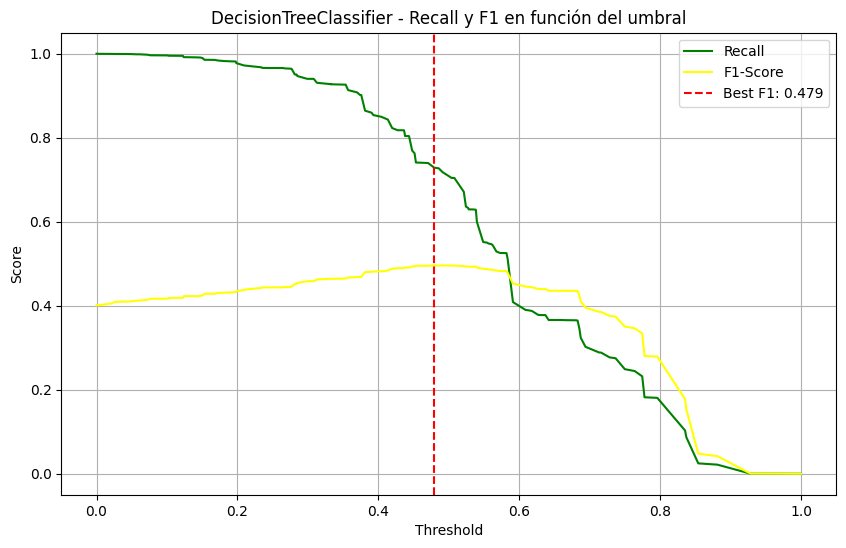

In [268]:
# Evaluación de umbral, F1 y Recall

# Entrenar el mejor modelo con los hiperparámetros óptimos
best_model = model_dt_2

# Obtener probabilidades de predicción en test
y_probs = best_model.predict_proba(X_test_reducido)[:, 1]  

# Calcular la curva de precisión-recall
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Calcular F1 para cada umbral
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)  # Evita divisiones por cero

# Encontrar los mejores umbrales para Recall y F1
best_threshold_f1 = thresholds[np.argmax(f1_scores)]


print(f"Mejor umbral para F1: {best_threshold_f1:.3f}")


# Graficar Recall y F1 en función del umbral
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls[:-1], label="Recall", color="green")
plt.plot(thresholds, f1_scores[:-1], label="F1-Score", color="yellow")
plt.axvline(x=best_threshold_f1, color="red", linestyle="--", label=f"Best F1: {best_threshold_f1:.3f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title(f'{best_model.__class__.__name__} - Recall y F1 en función del umbral')
plt.legend()
plt.grid()
plt.show()

DecisionTreeClassifier
 
 🔵 Train results:
 AUC: 0.730
 Recall : 0.728
 F1-score : 0.496
 Precision : 0.376
 Specificity: 0.595
 Accuracy: 0.629
 
 🟠 Test results:
 AUC: 0.731
 Recall : 0.729
 F1-score : 0.496
 Precision : 0.376
 Specificity: 0.595
 Accuracy: 0.628


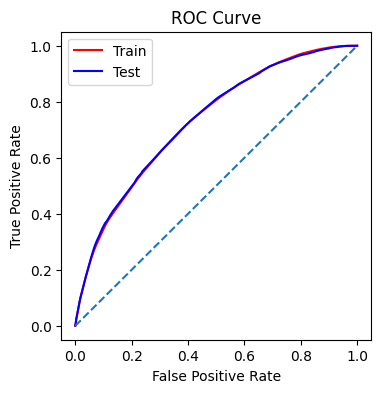

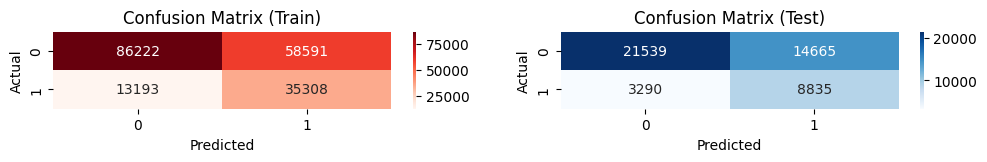

In [269]:
# Evaluamos el modelo
compute_metrics(model_dt_2, X_train_reducido, y_train, X_test_reducido, y_test, trh=0.479)

#### 6.5. Random Forest

- Random Forest

In [274]:
# Definimos el modelo random forest
model_rf_1 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)

# Entrenamos el modelo
model_rf_1.fit(X_train_reducido, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

RandomForestClassifier
 
 🔵 Train results:
 AUC: 1.000
 Recall : 1.000
 F1-score : 1.000
 Precision : 1.000
 Specificity: 1.000
 Accuracy: 1.000
 
 🟠 Test results:
 AUC: 0.719
 Recall : 0.270
 F1-score : 0.359
 Precision : 0.539
 Specificity: 0.923
 Accuracy: 0.759


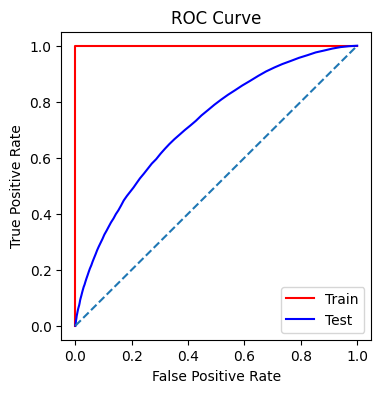

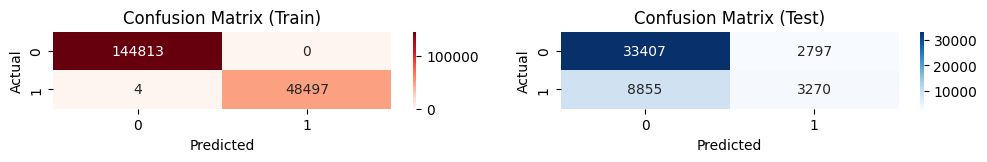

In [275]:
# Evaluamos el modelo
compute_metrics(model_rf_1, X_train_reducido, y_train, X_test_reducido, y_test, trh=0.5)

- Optimizacion con Optuna

In [143]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
import optuna.visualization as vis

# Definir la función objetivo para Optuna 
def objective(trial):
    # 🔹 **Hiperparámetros ajustados para reducir sobreajuste**
    n_estimators = trial.suggest_int('n_estimators', 50, 300)  # Reducimos la cantidad de árboles
    max_depth = trial.suggest_int('max_depth', 3, 15)  # Árboles menos profundos
    min_samples_split = trial.suggest_int('min_samples_split', 5, 20)  # Más muestras para hacer splits
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10)  # Más muestras en las hojas
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])  # Eliminamos 'log_loss' para estabilidad
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', 0.5])  # Menos features por split
    bootstrap = trial.suggest_categorical('bootstrap', [True])  # Usamos solo bootstrap para estabilidad
    class_weight = trial.suggest_categorical('class_weight', ['balanced'])  # Mantenemos el balanceo de clases
    oob_score = trial.suggest_categorical('oob_score', [True, False])  # Evaluación OOB para medir overfitting
    warm_start = trial.suggest_categorical('warm_start', [False])  # Evitamos `warm_start` para consistencia
    max_samples = trial.suggest_float('max_samples', 0.6, 0.9) if bootstrap else None  # Limitamos la cantidad de datos por árbol

    # **Modelo de Random Forest con hiperparámetros optimizados**
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        criterion=criterion,
        max_features=max_features,
        bootstrap=bootstrap,
        class_weight=class_weight,
        oob_score=oob_score,
        warm_start=warm_start,
        max_samples=max_samples,
        random_state=42,
        n_jobs=-1  # Usar todos los núcleos para acelerar el entrenamiento
    )
    # Evaluación con validación cruzada usando AUC-ROC
    auc = cross_val_score(model, X_train_reducido, y_train, cv=5, scoring='roc_auc').mean()

    return auc  # Optuna maximizará este Score

# Configurar Optuna con un pruner para evitar pruebas innecesarias
pruner = optuna.pruners.MedianPruner()  # Detiene pruebas si no mejoran la mediana
study = optuna.create_study(direction="maximize", pruner=pruner)  
study.optimize(objective, n_trials=25)  # Ejecutar 1000 pruebas

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", study.best_params)


[I 2025-02-03 15:06:32,171] A new study created in memory with name: no-name-f5a9e1d9-b712-4588-a474-bd42a5152e24


[I 2025-02-03 15:07:49,110] Trial 0 finished with value: 0.7176902590509868 and parameters: {'n_estimators': 134, 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 4, 'criterion': 'entropy', 'max_features': 'sqrt', 'bootstrap': True, 'class_weight': 'balanced', 'oob_score': True, 'warm_start': False, 'max_samples': 0.7902496205648692}. Best is trial 0 with value: 0.7176902590509868.
[I 2025-02-03 15:09:00,892] Trial 1 finished with value: 0.7244583772564795 and parameters: {'n_estimators': 244, 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 3, 'criterion': 'gini', 'max_features': 'sqrt', 'bootstrap': True, 'class_weight': 'balanced', 'oob_score': False, 'warm_start': False, 'max_samples': 0.7155005469664145}. Best is trial 1 with value: 0.7244583772564795.
[I 2025-02-03 15:16:04,177] Trial 2 finished with value: 0.7389666394298806 and parameters: {'n_estimators': 269, 'max_depth': 14, 'min_samples_split': 20, 'min_samples_leaf': 5, 'criterion': 'gini', 'max_featu

Mejores hiperparámetros: {'n_estimators': 228, 'max_depth': 15, 'min_samples_split': 14, 'min_samples_leaf': 10, 'criterion': 'entropy', 'max_features': 'log2', 'bootstrap': True, 'class_weight': 'balanced', 'oob_score': False, 'warm_start': False, 'max_samples': 0.6236794743150146}


In [144]:
vis.plot_param_importances(study)

In [145]:
vis.plot_slice(study)

In [147]:
# Definir el modelo con los mejores hiperparámetros
best_rf_model = RandomForestClassifier(**study.best_params, random_state=42, n_jobs=-1)

# Entrenar el modelo
best_rf_model.fit(X_train_reducido, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, max_features='log2',
                       max_samples=0.6236794743150146, min_samples_leaf=10,
                       min_samples_split=14, n_estimators=228, n_jobs=-1,
                       random_state=42)

Mejor umbral para F1: 0.473


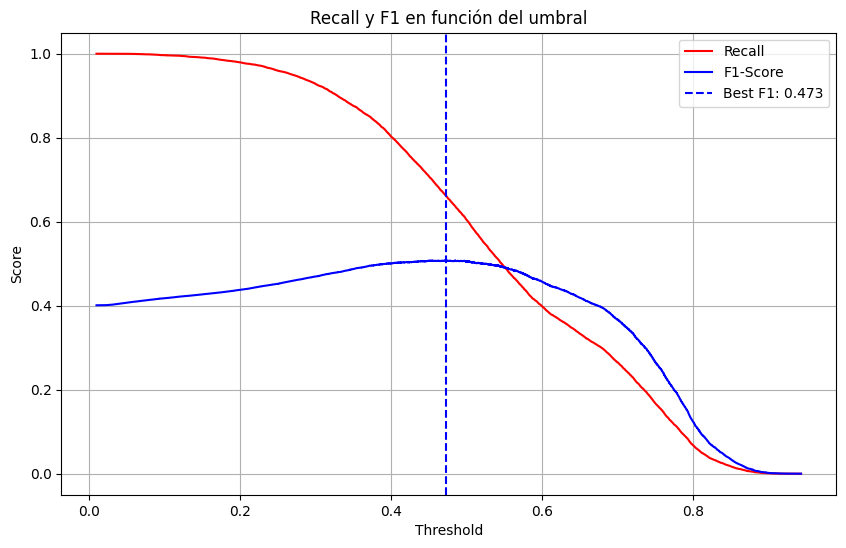

In [152]:
# Evaluación de umbral, F1 y Recall
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score, recall_score

# Entrenar el mejor modelo con los hiperparámetros óptimos
best_model = best_rf_model
best_model.fit(X_train_reducido, y_train)

# Obtener probabilidades de predicción en test
y_probs = best_model.predict_proba(X_test_reducido)[:, 1]  

# Calcular la curva de precisión-recall
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Calcular F1 para cada umbral
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)  # Evita divisiones por cero

# Encontrar los mejores umbrales para Recall y F1
best_threshold_f1 = thresholds[np.argmax(f1_scores)]


print(f"Mejor umbral para F1: {best_threshold_f1:.3f}")


# Graficar Recall y F1 en función del umbral
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls[:-1], label="Recall", color="red")
plt.plot(thresholds, f1_scores[:-1], label="F1-Score", color="blue")
plt.axvline(x=best_threshold_f1, color="blue", linestyle="--", label=f"Best F1: {best_threshold_f1:.3f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Recall y F1 en función del umbral")
plt.legend()
plt.grid()
plt.show()

RandomForestClassifier
 
 🔵 Train results:
 AUC: 0.816
 Recall : 0.761
 F1-score : 0.580
 Precision : 0.469
 Specificity: 0.711
 Accuracy: 0.723
 
 🟠 Test results:
 AUC: 0.745
 Recall : 0.662
 F1-score : 0.507
 Specificity: 0.683
 Precision : 0.411
 Accuracy: 0.677


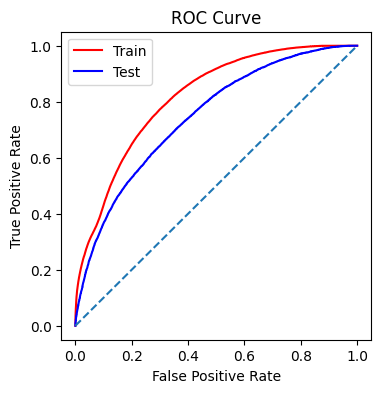

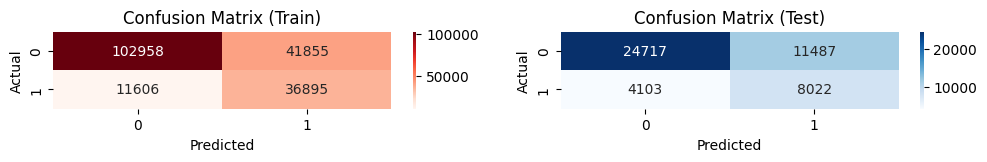

In [154]:
# calcular métricas con el umbral óptimo para el modelo
compute_metrics(best_model, X_train_reducido, y_train, X_test_reducido, y_test, trh=0.473)

- Con el unbral 0.41, el Recall y F1 se maximiza

#### ADABOOST

c:\Users\usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Train results:
AdaBoostClassifier Accuracy (Train): 0.766
AdaBoostClassifier AUC (Train): 0.732
AdaBoostClassifier Recall (Train): 0.237
AdaBoostClassifier Specificity (Train): 0.943
AdaBoostClassifier F1-score (Train): 0.337
Test results:
AdaBoostClassifier Accuracy (Test): 0.767
AdaBoostClassifier AUC (Test): 0.736
AdaBoostClassifier Recall (Test): 0.241
AdaBoostClassifier Specificity (Test): 0.943
AdaBoostClassifier F1-score (Test): 0.342


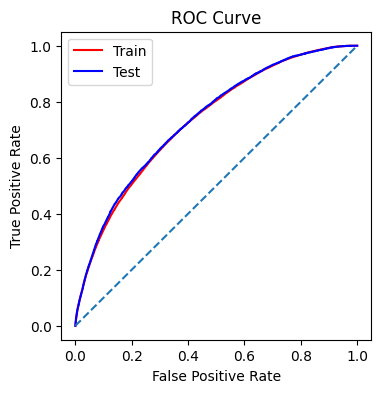

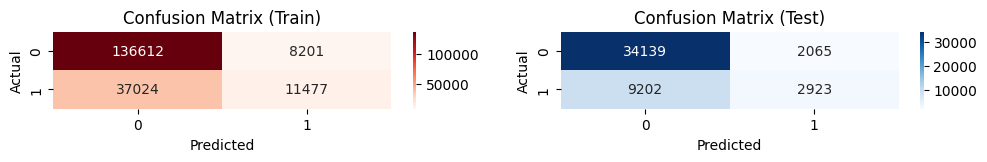

In [28]:
# Use AdaBoost model
from sklearn.ensemble import AdaBoostClassifier

# Define the model
model_ab_1 = AdaBoostClassifier(random_state=42, n_estimators=200, learning_rate=0.6)

# Train the model
model_ab_1.fit(X_train_reducido, y_train)

# Compute metrics
compute_metrics(model_ab_1, X_train_reducido, y_train, X_test_reducido, y_test, trh = 0.5)

c:\Users\usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Mejor umbral para F1: 0.498


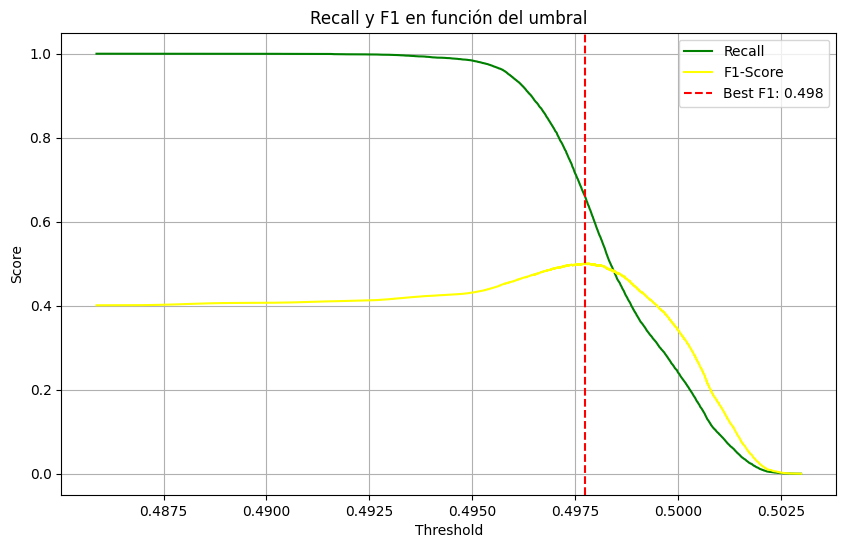

In [42]:
# Evaluación de umbral, F1 y Recall con dataset reducido
# Entrenar el mejor modelo con los hiperparámetros óptimos
best_model = model_ab_1
best_model.fit(X_train_reducido, y_train)

# Obtener probabilidades de predicción en test
y_probs = best_model.predict_proba(X_test_reducido)[:, 1]  

# Calcular la curva de precisión-recall
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Calcular F1 para cada umbral
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)  # Evita divisiones por cero

# Encontrar los mejores umbrales para Recall y F1
best_threshold_f1 = thresholds[np.argmax(f1_scores)]


print(f"Mejor umbral para F1: {best_threshold_f1:.3f}")


# Graficar Recall y F1 en función del umbral
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls[:-1], label="Recall", color="green")
plt.plot(thresholds, f1_scores[:-1], label="F1-Score", color="yellow")
plt.axvline(x=best_threshold_f1, color="red", linestyle="--", label=f"Best F1: {best_threshold_f1:.3f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Recall y F1 en función del umbral")
plt.legend()
plt.grid()
plt.show()

Train results:
AdaBoostClassifier Accuracy (Train): 0.582
AdaBoostClassifier AUC (Train): 0.732
AdaBoostClassifier Recall (Train): 0.797
AdaBoostClassifier Specificity (Train): 0.510
AdaBoostClassifier F1-score (Train): 0.489
Test results:
AdaBoostClassifier Accuracy (Test): 0.583
AdaBoostClassifier AUC (Test): 0.736
AdaBoostClassifier Recall (Test): 0.801
AdaBoostClassifier Specificity (Test): 0.510
AdaBoostClassifier F1-score (Test): 0.491


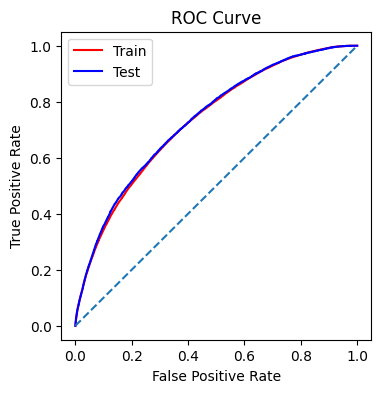

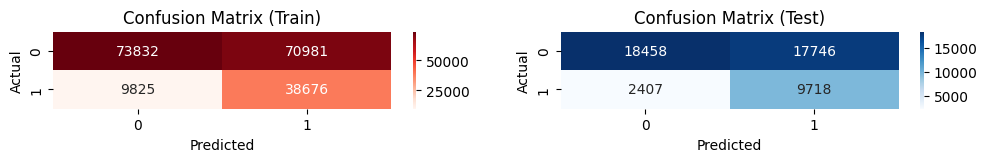

In [53]:
compute_metrics(model_ab_1, X_train_reducido, y_train, X_test_reducido, y_test, trh = 0.4971)

- Optimización de Adaboost con Optuna

In [61]:
import optuna
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Definir la función objetivo para Optuna
def objective(trial):
    # Sugerir hiperparámetros
    n_estimators = trial.suggest_int('n_estimators', 50, 300)  # Número de árboles débiles
    learning_rate = trial.suggest_float('learning_rate', 0.01, 1.0, log=True)  # Tasa de aprendizaje
    algorithm = trial.suggest_categorical('algorithm', ['SAMME', 'SAMME.R'])  # Algoritmo de boosting
    max_depth = trial.suggest_int('max_depth', 1, 10)  # Profundidad del árbol base
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)  # Mínimo de muestras para dividir nodo
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)  # Mínimo de muestras en una hoja
    class_weight = trial.suggest_categorical('class_weight', ['balanced', None])  # Balanceo de clases

    # Definir el base estimator como un árbol de decisión optimizado
    estimator = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        class_weight=class_weight,
        random_state=42
    )

    # Crear el modelo AdaBoost con los hiperparámetros sugeridos
    model = AdaBoostClassifier(
        estimator=estimator,
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        algorithm=algorithm,
        random_state=42
    )

    # Evaluación con validación cruzada usando AUC-ROC
    auc = cross_val_score(model, X_train_reducido, y_train, cv=5, scoring='roc_auc').mean()

    return auc  # Optuna maximizará este Score

# Configurar Optuna con un pruner para detener pruebas innecesarias
pruner = optuna.pruners.MedianPruner()  # Detiene pruebas si no mejoran la mediana
study = optuna.create_study(direction="maximize", pruner=pruner)  
study.optimize(objective, n_trials=15)  # Ejecutar 50 pruebas

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", study.best_params)


[I 2025-02-01 19:54:47,101] A new study created in memory with name: no-name-2d8717e8-4412-4013-bda0-7172d622abb5


[I 2025-02-01 20:01:00,965] Trial 0 finished with value: 0.7302607946158025 and parameters: {'n_estimators': 169, 'learning_rate': 0.07859309245951036, 'algorithm': 'SAMME', 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 3, 'class_weight': None}. Best is trial 0 with value: 0.7302607946158025.
c:\Users\usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

c:\Users\usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

c:\Users\usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the defa

Mejores hiperparámetros: {'n_estimators': 214, 'learning_rate': 0.2432391727675153, 'algorithm': 'SAMME', 'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 5, 'class_weight': None}


- Utilizando los mejores parámetros (ver como extraerlos autoáticamente)

In [69]:
# Definir el clasificador base (árbol de decisión)
base_estimator = DecisionTreeClassifier(
    max_depth=7,
    min_samples_split=8,
    min_samples_leaf=5,
    class_weight=None
)

# Definir el modelo AdaBoost con el clasificador base
best_adaboost_model_1 = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=214,
    learning_rate=0.2432391727675153,
    algorithm='SAMME',
    random_state=42
)

Mejor umbral para F1: 0.366


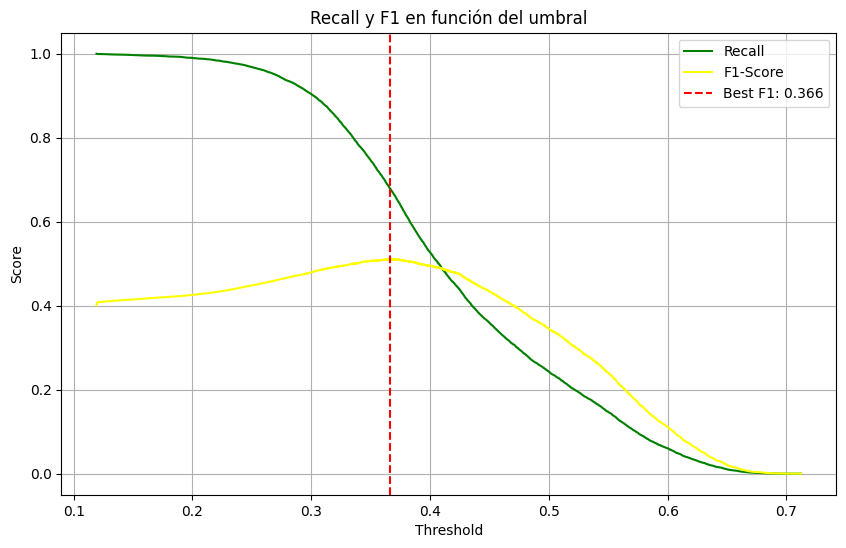

In [70]:
# Evaluación de umbral, F1 y Recall con dataset reducido

# Entrenar el mejor modelo con los hiperparámetros óptimos de Optuna
best_model = best_adaboost_model_1

# Entrenar el mejor modelo con los hiperparámetros óptimos
best_model.fit(X_train_reducido, y_train)

# Obtener probabilidades de predicción en test
y_probs = best_model.predict_proba(X_test_reducido)[:, 1]  

# Calcular la curva de precisión-recall
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Calcular F1 para cada umbral
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)  # Evita divisiones por cero

# Encontrar los mejores umbrales para Recall y F1
best_threshold_f1 = thresholds[np.argmax(f1_scores)]


print(f"Mejor umbral para F1: {best_threshold_f1:.3f}")


# Graficar Recall y F1 en función del umbral
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls[:-1], label="Recall", color="green")
plt.plot(thresholds, f1_scores[:-1], label="F1-Score", color="yellow")
plt.axvline(x=best_threshold_f1, color="red", linestyle="--", label=f"Best F1: {best_threshold_f1:.3f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Recall y F1 en función del umbral")
plt.legend()
plt.grid()
plt.show()

AdaBoostClassifier
 
 🔵 Train results:
 AUC: 0.750
 Recall : 0.664
 F1-score : 0.512
 Precision : 0.417
 Accuracy: 0.683
 Balanced Accuracy: 0.677
 
 🟠 Test results:
 AUC: 0.745
 Recall : 0.663
 F1-score : 0.510
 Precision : 0.414
 Accuracy: 0.680
 Balanced Accuracy: 0.674


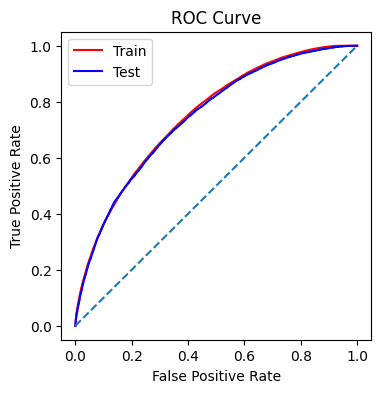

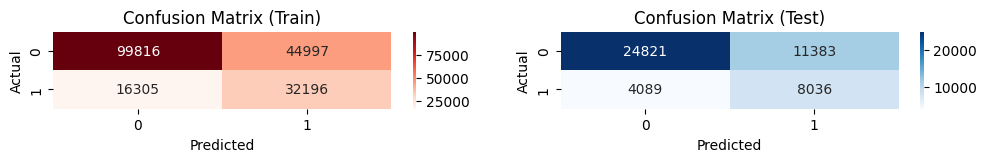

In [125]:
# Metricas del modelo
compute_metrics_2(best_adaboost_model_1, X_train_reducido, y_train, X_test_reducido, y_test, trh = 0.37)

Train results:
AdaBoostClassifier Accuracy (Train): 0.674
AdaBoostClassifier AUC (Train): 0.750
AdaBoostClassifier Recall (Train): 0.682
AdaBoostClassifier Specificity (Train): 0.672
AdaBoostClassifier F1-score (Train): 0.512
Test results:
AdaBoostClassifier Accuracy (Test): 0.672
AdaBoostClassifier AUC (Test): 0.745
AdaBoostClassifier Recall (Test): 0.680
AdaBoostClassifier Specificity (Test): 0.669
AdaBoostClassifier F1-score (Test): 0.510


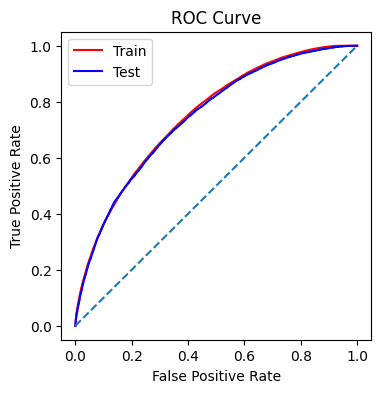

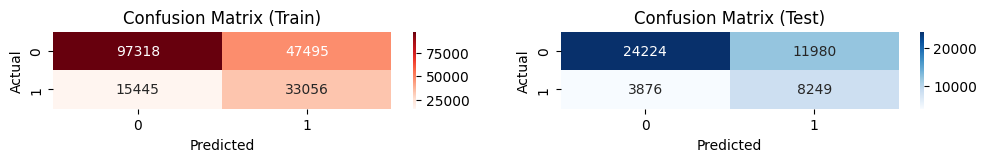

In [82]:
# Metricas del modelo
compute_metrics(best_adaboost_model_1, X_train_reducido, y_train, X_test_reducido, y_test, trh = 0.366)

#### XGBOOST

Train results:
XGBClassifier Accuracy (Train): 0.584
XGBClassifier AUC (Train): 0.739
XGBClassifier Recall (Train): 0.810
XGBClassifier Specificity (Train): 0.508
XGBClassifier F1-score (Train): 0.494
Test results:
XGBClassifier Accuracy (Test): 0.584
XGBClassifier AUC (Test): 0.741
XGBClassifier Recall (Test): 0.813
XGBClassifier Specificity (Test): 0.507
XGBClassifier F1-score (Test): 0.495


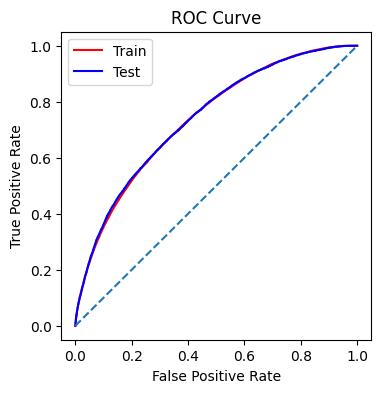

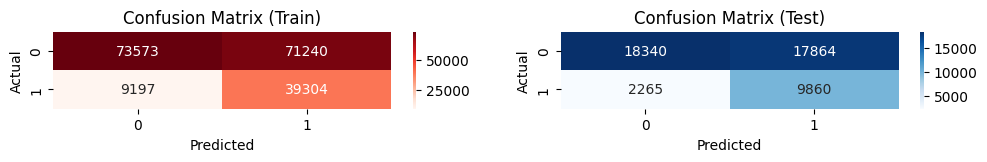

In [62]:
# XGBoost model

from xgboost import XGBClassifier

# Define the model
model_xgb_1 = XGBClassifier(random_state=1234, booster='gbtree', n_estimators=50, learning_rate=0.3, max_depth=3, subsample=0.9, colsample_bytree=0.8, gamma=0.1)

# Train the model
model_xgb_1.fit(X_train_reducido, y_train)

# Compute metrics
compute_metrics(model_xgb_1, X_train_reducido, y_train, X_test_reducido, y_test, trh = 0.2)

- Optimización con Optuna

In [132]:
import optuna
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Definir la función objetivo para Optuna
def objective(trial):
    # Sugerir hiperparámetros
    n_estimators = trial.suggest_int('n_estimators', 50, 800)  # Más árboles para mejorar generalización
    max_depth = trial.suggest_int('max_depth', 3, 10)  # Evita árboles demasiado profundos (overfitting)
    learning_rate = trial.suggest_float('learning_rate', 0.005, 0.3, log=True)  # Ajuste fino con log-scale
    subsample = trial.suggest_float('subsample', 0.6, 0.9)  # Ayuda a evitar overfitting
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.3, 0.9)  # Reduce correlación entre árboles
    gamma = trial.suggest_float('gamma', 0, 5)  # Controla divisiones en árboles
    min_child_weight = trial.suggest_int('min_child_weight', 1, 20)  # Controla tamaño mínimo de hojas
    reg_alpha = trial.suggest_float('reg_alpha', 0, 5)  # Regularización L1
    reg_lambda = trial.suggest_float('reg_lambda', 0.5, 5)  # Regularización L2
    scale_pos_weight = trial.suggest_float('scale_pos_weight', 1, 5)  # Compensa el desbalance de clases


    # Crear el modelo XGBoost con los hiperparámetros sugeridos
    model = xgb.XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        gamma=gamma,
        min_child_weight=min_child_weight,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        objective='binary:logistic',
        eval_metric='auc',
        random_state=42,
        scale_pos_weight=scale_pos_weight,
        n_jobs=-1  # Usa todos los núcleos disponibles
    )

    # Evaluar con validación cruzada usando AUC-ROC
    auc = cross_val_score(model, X_train_reducido, y_train, cv=5, scoring='roc_auc').mean()

    return auc  # Optuna maximizará este Score

# Configurar Optuna con un pruner para detener pruebas innecesarias
pruner = optuna.pruners.MedianPruner()  # Detiene ensayos si no mejoran la mediana
study = optuna.create_study(direction="maximize", pruner=pruner)  
study.optimize(objective, n_trials=500)  # Ejecutar 50 pruebas

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", study.best_params)


[I 2025-02-02 19:59:27,392] A new study created in memory with name: no-name-b36226a4-36a3-435f-a23b-164f3328a20e
[I 2025-02-02 19:59:48,314] Trial 0 finished with value: 0.7400962420924367 and parameters: {'n_estimators': 169, 'max_depth': 6, 'learning_rate': 0.03750501767352405, 'subsample': 0.8244090876627512, 'colsample_bytree': 0.4574398544414609, 'gamma': 3.1274116888494605, 'min_child_weight': 2, 'reg_alpha': 3.1014979582513806, 'reg_lambda': 2.8759491642769373, 'scale_pos_weight': 2.1705101791921875}. Best is trial 0 with value: 0.7400962420924367.
[I 2025-02-02 20:00:11,127] Trial 1 finished with value: 0.7386019893578044 and parameters: {'n_estimators': 71, 'max_depth': 10, 'learning_rate': 0.011890471910123735, 'subsample': 0.8414714769992517, 'colsample_bytree': 0.685319066516642, 'gamma': 2.325512439556767, 'min_child_weight': 15, 'reg_alpha': 1.0861904307107806, 'reg_lambda': 4.177716913821387, 'scale_pos_weight': 2.3366449660782025}. Best is trial 0 with value: 0.7400962

Mejores hiperparámetros: {'n_estimators': 774, 'max_depth': 10, 'learning_rate': 0.02896883266325488, 'subsample': 0.8805376991702804, 'colsample_bytree': 0.34912708866228775, 'gamma': 2.0087363558843325, 'min_child_weight': 16, 'reg_alpha': 1.0822272375745905, 'reg_lambda': 1.8149260120479551, 'scale_pos_weight': 1.100357453812708}


Mejor umbral para F1: 0.285


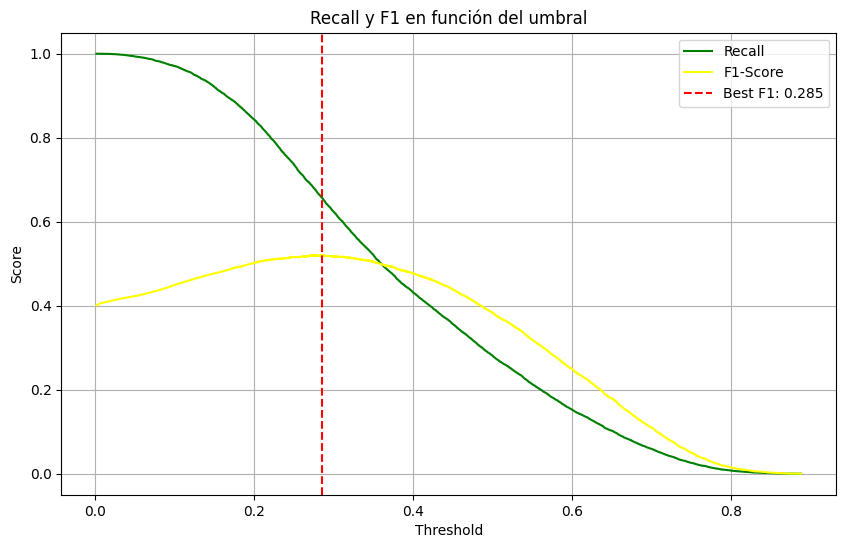

In [133]:
# Evaluación de umbral, F1 y Recall con dataset reducido

best_model_xgb_1 = xgb.XGBClassifier(**study.best_params, random_state=42, n_jobs=-1)

# Entrenar el mejor modelo con los hiperparámetros óptimos
best_model = best_model_xgb_1
best_model.fit(X_train_reducido, y_train)

# Obtener probabilidades de predicción en test
y_probs = best_model.predict_proba(X_test_reducido)[:, 1]  

# Calcular la curva de precisión-recall
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Calcular F1 para cada umbral
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)  # Evita divisiones por cero

# Encontrar los mejores umbrales para Recall y F1
best_threshold_f1 = thresholds[np.argmax(f1_scores)]


print(f"Mejor umbral para F1: {best_threshold_f1:.3f}")


# Graficar Recall y F1 en función del umbral
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls[:-1], label="Recall", color="green")
plt.plot(thresholds, f1_scores[:-1], label="F1-Score", color="yellow")
plt.axvline(x=best_threshold_f1, color="red", linestyle="--", label=f"Best F1: {best_threshold_f1:.3f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Recall y F1 en función del umbral")
plt.legend()
plt.grid()
plt.show()

XGBClassifier
 
 🔵 Train results:
 AUC: 0.795
 Recall : 0.710
 F1-score : 0.562
 Precision : 0.465
 Specificity: 0.727
 Accuracy: 0.722
 
 🟠 Test results:
 AUC: 0.755
 Recall : 0.658
 F1-score : 0.519
 Specificity: 0.707
 Precision : 0.429
 Accuracy: 0.695


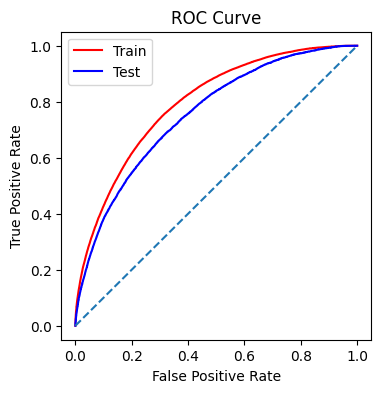

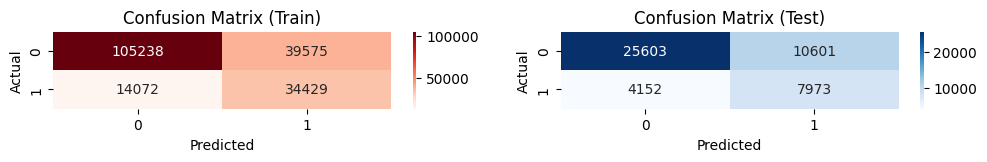

In [139]:
# Metricas del modelo
compute_metrics(best_model_xgb_1, X_train_reducido, y_train, X_test_reducido, y_test, trh = 0.285)